In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r'/Users/jamilyalipons/Downloads/amz_uk_price_prediction_dataset.csv')
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName'],
      dtype='object')

In [7]:
frequency_table = df['categoryName'].value_counts()

In [9]:
frequency_table.head()


categoryName
Sports & Outdoors               826076
Skin Care                        18755
Fragrances                       18563
Make-up                          18453
Manicure & Pedicure Products     17212
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='categoryName', ylabel='count'>

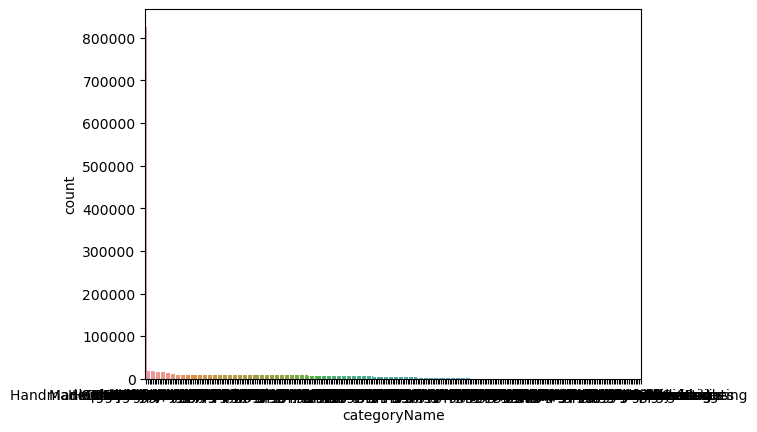

In [12]:
sns.barplot(pd.DataFrame(frequency_table).reset_index(),x='categoryName',y='count')

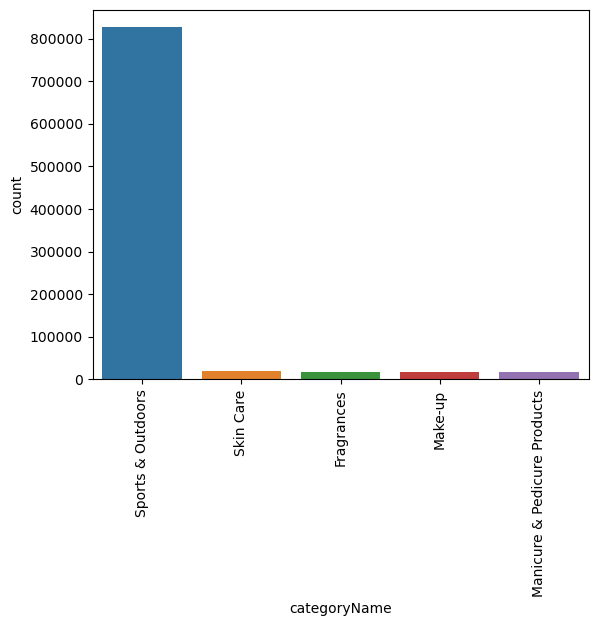

In [20]:
sns.barplot(pd.DataFrame(frequency_table).reset_index().head(),x='categoryName',y='count')
plt.xticks(rotation=90);

In [22]:
frequency_table

categoryName
Sports & Outdoors                 826076
Skin Care                          18755
Fragrances                         18563
Make-up                            18453
Manicure & Pedicure Products       17212
                                   ...  
Torches                               64
Smart Home Security & Lighting        57
Lighting                              50
Smart Speakers                        25
Cameras                               12
Name: count, Length: 296, dtype: int64

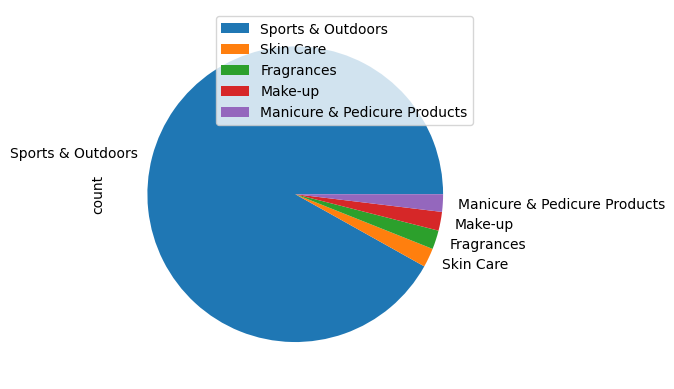

In [33]:
df['categoryName'].value_counts().head().plot(kind='pie',legend=True)
plt.legend(loc='best')

In [ ]:
#Part 2: Delving Into Product Pricing

In [ ]:
# 2.1 Measures of Centrality

In [37]:
print(f"Average {df['price'].mean()},median {df['price'].median()}, mode {df['price'].mode()[0]}")




Average 94.2573745805856,median 19.9, mode 9.99


In [ ]:
# 2.2 Measures of Dispersion

In [39]:
print(f"""Variance {df['price'].var()},standard deviation {df['price'].std()}, 
range {df['price'].max()-df['price'].min()}, IQR{df['price'].quantile(0.75)-df['price'].quantile(0.25)}""")


Variance 130048.56935124291,standard deviation 360.62247482823767, 
range 100000.0, IQR37.71


In [ ]:
# 2.3 Visualizations

In [44]:
cut_price = pd.DataFrame(pd.cut(df['price'],bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000,10000,100000]).value_counts().sort_index()).reset_index()

In [45]:
cut_price

,price,count
0,"(0, 10]",557827
1,"(10, 20]",586643
2,"(20, 30]",289074
3,"(30, 40]",162117
4,"(40, 50]",98232
5,"(50, 60]",68807
6,"(60, 70]",51798
7,"(70, 80]",39854
8,"(80, 90]",30945
9,"(90, 100]",25956


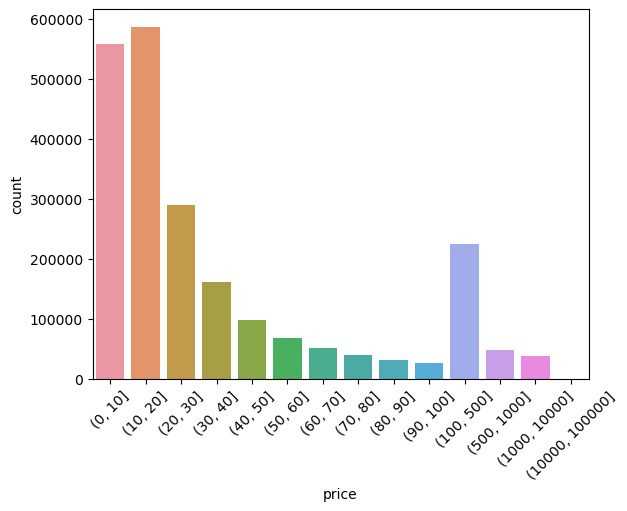

In [46]:
sns.barplot(cut_price,x='price',y='count')
plt.xticks(rotation=45);

<Axes: >

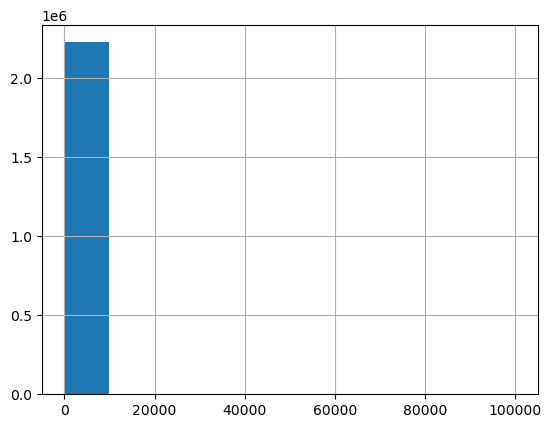

In [42]:
df['price'].hist()

<Axes: >

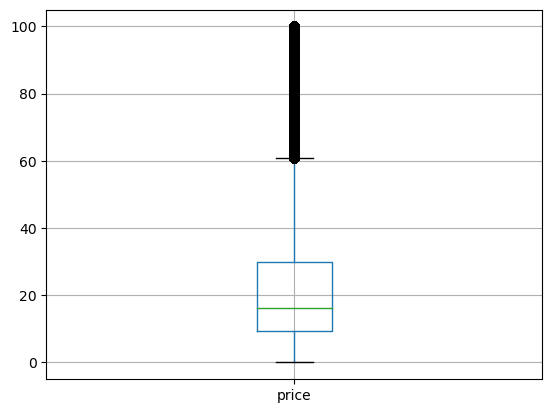

In [41]:
df.query('price<100').boxplot(column='price')

In [47]:
pd.cut(df['price'],bins=[0,60,100,1000,100000]).value_counts().sort_index()

price
(0, 60]           1762700
(60, 100]          148553
(100, 1000]        272721
(1000, 100000]      38750
Name: count, dtype: int64

In [50]:
# Part 3: Un packing Product Ratings
# Measures of Centrality
df

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...,...
2222737,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",https://m.media-amazon.com/images/I/61ycPU7k4k...,https://www.amazon.co.uk/dp/B0CHSD7P2Q,0.0,0,22.34,False,0,Motorbike Clothing
2222738,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,https://m.media-amazon.com/images/I/51gkh0iYT5...,https://www.amazon.co.uk/dp/B0B7B8FNBQ,0.0,0,97.99,False,0,Motorbike Clothing
2222739,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,https://m.media-amazon.com/images/I/81gJgaMHg4...,https://www.amazon.co.uk/dp/B0BD5FL5FB,0.0,0,52.99,False,0,Motorbike Clothing
2222740,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,https://m.media-amazon.com/images/I/81KQ5askGG...,https://www.amazon.co.uk/dp/B008OYLL4I,4.3,404,79.99,False,0,Motorbike Clothing


In [57]:
((df['reviews']==0) &(df['stars']==0))

0          False
1          False
2          False
3          False
4          False
           ...  
2222737     True
2222738     True
2222739     True
2222740    False
2222741    False
Length: 2222742, dtype: bool

In [58]:
~((df['reviews']==0) &(df['stars']==0))

0           True
1           True
2           True
3           True
4           True
           ...  
2222737    False
2222738    False
2222739    False
2222740     True
2222741     True
Length: 2222742, dtype: bool

In [51]:
print(f"Average {df['stars'].mean()},median {df['stars'].median()}, mode {df['stars'].mode()[0]}")


Average 2.0318699606162127,median 0.0, mode 0.0


In [56]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"Average {df_bought['stars'].mean()},median {df_bought['stars'].median()}, mode {df_bought['stars'].mode()[0]}")

Average 4.30814453955941,median 4.4, mode 4.5


In [65]:
# 3.1 Measures of Dispersion
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"""Variance {df_bought['stars'].var()},standard deviation {df_bought['stars'].std()}, 
range {df['stars'].max()-df['stars'].min()}, IQR {df_bought['stars'].quantile(0.75)-df_bought['stars'].quantile(0.25)}""")

Variance 0.32080556538215915,standard deviation 0.5663970033308432, 
range 5.0, IQR 0.5


In [ ]:
# 3.2 Shape of Distribution


In [69]:
df['stars'].value_counts().head()

stars
0.0    1174420
4.5     128640
4.4     115743
4.6     114933
5.0     110015
Name: count, dtype: int64

In [64]:
print(f"Skewness {df['stars'].skew()}, kurtosis {df['stars'].kurtosis()}")

Skewness 0.18791227498746874, kurtosis -1.8982043343323995


In [70]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"Skewness {df_bought['stars'].skew()}, kurtosis {df_bought['stars'].kurtosis()}")

Skewness -2.3575699108731474, kurtosis 9.451563367195146


In [ ]:
# 3.3 Visualizations

<Axes: >

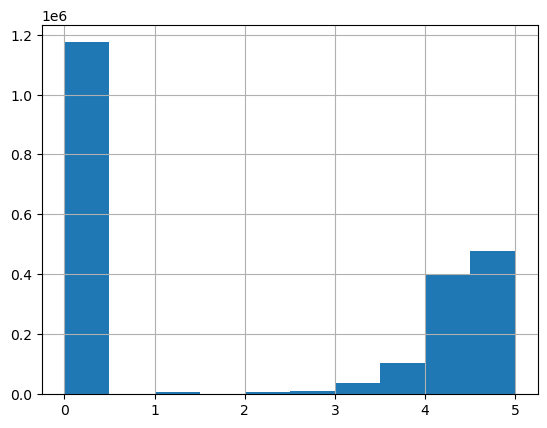

In [71]:
df['stars'].hist()

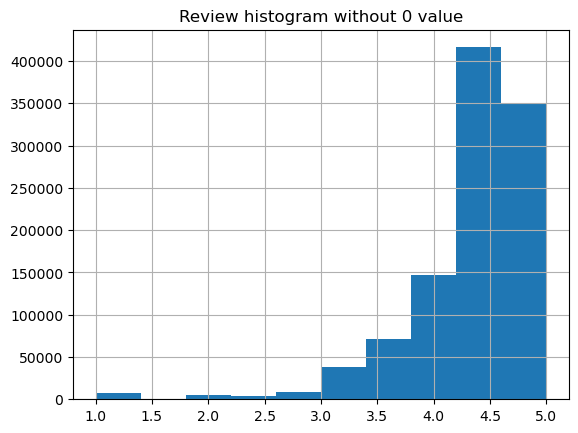

In [74]:
df_bought['stars'].hist()
plt.title('Review histogram without 0 value');